In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
#from scipy.special import binom
import pandas as pd
#import math
#import pickle
#import statsmodels.stats.power
import statsmodels.api as sm
#import statsmodels.stats.multitest as mt
#from sklearn import datasets
import statistics
from sklearn.metrics import mean_squared_error
from math import sqrt

# Galton dataset

In [3]:
father_son = pd.read_csv('father_son.csv')
father_son.head()

,Unnamed: 0,fheight,sheight
0,1,65.04851,59.77827
1,2,63.25094,63.21404
2,3,64.95532,63.34242
3,4,65.75250,62.79238
4,5,61.13723,64.28113


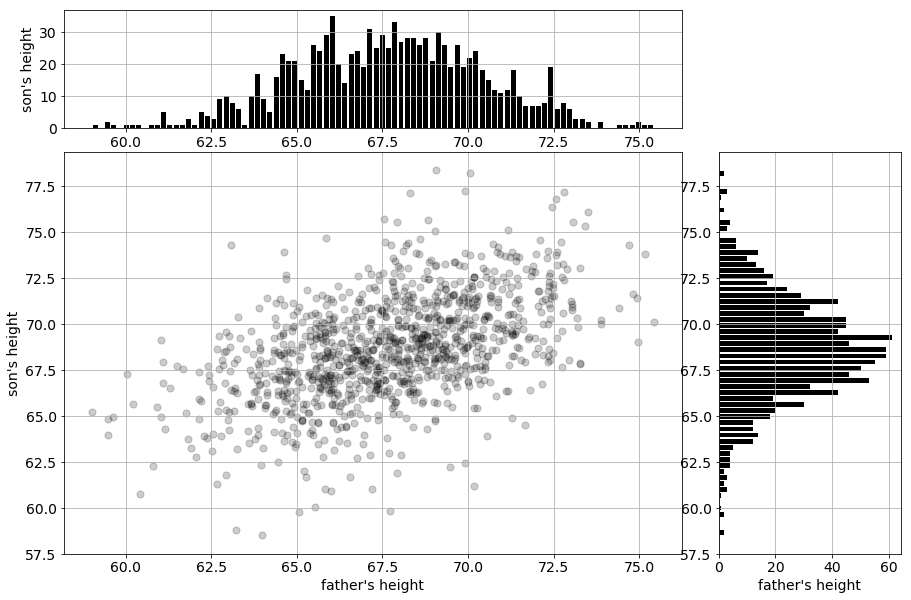

In [4]:
# see https://stackoverflow.com/questions/37008112/matplotlib-plotting-histogram-plot-just-above-scatter-plot

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

plt.rcParams.update({'font.size': 14})

fheight = father_son['fheight'].values
sheight = father_son['sheight'].values

fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(4, 4)
ax_main = plt.subplot(gs[1:4, :3])
ax_fDist = plt.subplot(gs[0, :3],sharex=ax_main)
ax_sDist = plt.subplot(gs[1:4, 3],sharey=ax_main)

ax_main.scatter(fheight, sheight, c='k', alpha = .2, s=50)
ax_main.set(xlabel="father's height", ylabel="son's height")
ax_main.grid(True)

ax_fDist.hist(fheight, bins=90, align='mid', rwidth=0.8, color='k')
ax_fDist.set(ylabel="son's height")
ax_fDist.grid(True)

ax_sDist.hist(sheight, bins=60, orientation='horizontal', align='mid', rwidth=0.8, color='k')
ax_sDist.set(xlabel="father's height")
ax_sDist.grid(True)

plt.show()

In [5]:
x = np.random.randn(10) + 6
y = x/3 + np.random.randn(10)/1.5 - 2
x1 = np.array(range(11))

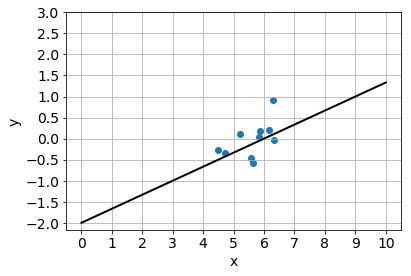

In [6]:
plt.scatter(x, y)
plt.plot(x1, x1/3 - 2, '-', c='k', lw=2)
plt.xticks(x1)
plt.yticks(np.linspace(-2, 3, 11))
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

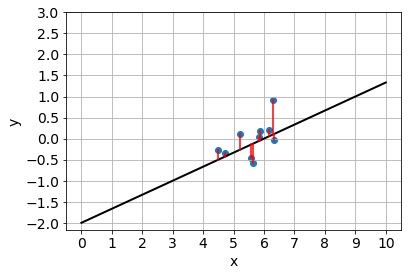

In [7]:
def f(x):
    return x/3 - 2

yf = f(x)
plt.scatter(x, y)
plt.plot(x1, f(x1), '-', c='k', lw=2)
[plt.plot([x[i], x[i]], [y[i], yf[i]], c='r') for i in range(len(x))]

plt.xticks(x1)
plt.yticks(np.linspace(-2, 3, 11))
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

beta0: 33.88660435407794 beta1: 0.5140930386233075
intercept: 33.88660435407803 coefficient: 0.5140930386233061


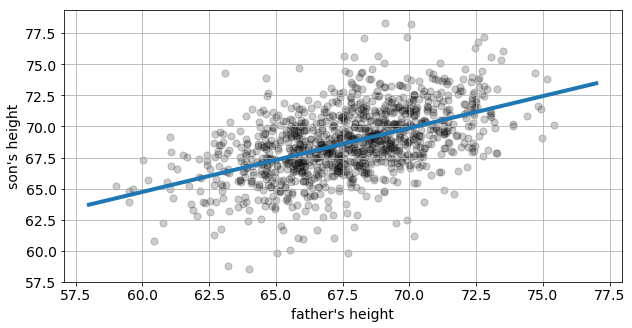

In [8]:
# see https://machinelearningmastery.com/introduction-to-expected-value-variance-and-covariance/

x, y = np.array(fheight), np.array(sheight)
beta1 = np.corrcoef(x, y)[0, 1] * np.std(y)/np.std(x)
beta0 = np.mean(y) - beta1 * np.mean(x)
print('beta0:', beta0, 'beta1:', beta1)

xext = sm.add_constant(x)

lm = sm.OLS(y, xext).fit()
print('intercept:', lm.params[0], 'coefficient:', lm.params[1])

x1 = np.linspace(58, 77, 100)
y1 = beta1 * x1 + beta0

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x, y, c='k', alpha = .2, s=50)
ax.plot(x1, y1, lw=4)
ax.set(xlabel="father's height", ylabel="son's height")
ax.grid(True)
plt.show()

# Regresia catre medie

In [9]:
x = np.random.randn(10)
ordered = np.argsort(x)[::-1]

y = np.random.randn(10)

# doar in 1 caz din 11 vom obtine un numar mai mic
print(x[ordered[0]], '>', y[ordered[0]])

1.2831704915702598 > 0.44643273657589555


In [10]:
# verificare
n = 10000000
x = np.random.randn(n, 10)
ordered = np.argsort(x, axis=1)
for i in range(x.shape[0]):
    x[i, :] = x[i, ordered[i][::-1]]

y = np.random.randn(n, 10)
print(np.sum(x[:, 0] < y[:, 0]) / n, 'vs. 1/11 =', 1/11)

0.0909107 vs. 1/11 = 0.09090909090909091


rho: 0.501338311172343


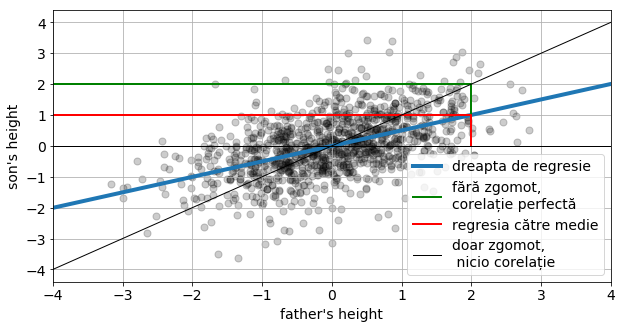

In [11]:
# originea este acum (Xbar, Ybar)
x, y = np.array(fheight), np.array(sheight)
x, y = (x - np.mean(x))/np.std(x), (y - np.mean(y))/np.std(y)
rho = np.corrcoef(x, y)[0, 1]
print('rho:', rho)

x1 = np.linspace(-4, 4, 100)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x, y, c='k', alpha = .2, s=50)
ax.plot(x1, rho * x1, lw=4)
ax.plot([2, 2, -4], [0, 2, 2], 'g', lw=2)
ax.plot([2, 2, -4], [0, 1, 1], 'r', lw=2)
ax.plot(x1, x1, lw=1, c='k')
ax.plot(x1, [0] * len(x1), lw=1, c='k')
ax.legend(['dreapta de regresie', 'fără zgomot,\ncorelație perfectă', 'regresia către medie', 
           'doar zgomot,\n nicio corelație'])
ax.set(xlabel="father's height", ylabel="son's height", xlim=(-4, 4))
ax.grid(True)
plt.show()

# Laborator

Q1. Considerăm setul $X = \{0.725, 0.429, -0.372, 0.863\}$. Ce valoare a lui $\mu$ minimizează $\sum_i (X_i - \mu)^2$ ? Verificați cu câteva valori în jur.

In [12]:
x = np.array([0.725, 0.429, -0.372, 0.863])
mu = 1/len(x) * np.sum(x)
mu1 = np.float32(0.40)
mu2 = np.float32(0.42)
print("Minim mu : ", mu)
print("Suma pentru mu minim : ",np.sum((x-mu)**2))
print("Suma pentru mu mai mic decat mu minim gasit : ",np.sum((x-mu1)**2))
print("Suma pentru mu mai mare decat mu minim gasit : ",np.sum((x-mu2)**2))

Minim mu :  0.41125
Suma pentru mu minim :  0.9163127500000001
Suma pentru mu mai mic decat mu minim gasit :  0.9168189994635583
Suma pentru mu mai mare decat mu minim gasit :  0.9166189990820892


Q2. Pentru problema anterioară, considerăm că se dă un set de ponderi $w = \{2, 2, 1, 1\}$. Dorim să minimizăm suma $\sum_i w_i(x-\mu)^2$. Ce valoare pentru $\mu$ obținem?

In [13]:
x = np.array([0.725, 0.429, -0.372, 0.863])
w = np.array([2, 2, 1, 1])
mu = 1/np.sum(w) * np.sum(w*x)
mu1 = np.float32(0.47)
mu2 = np.float32(0.45)
print("Minim mu : ", mu)
print("Suma pentru mu minim                         : ",np.sum(w*(x-mu)**2))
print("Suma pentru mu mai mic decat mu minim gasit  : ",np.sum(w*(x-mu1)**2))
print("Suma pentru mu mai mare decat mu minim gasit : ",np.sum(w*(x-mu2)**2))




Minim mu :  0.46649999999999997
Suma pentru mu minim                         :  0.9967515000000001
Suma pentru mu mai mic decat mu minim gasit  :  0.996824999949932
Suma pentru mu mai mare decat mu minim gasit :  0.9983850023603448


Q3. Pentru setul Galton (fathers.sons):
    
a) găsiți media, deviația standard și corelația dintre înălțimile părinților și cele ale fiilor.
b) centrați variabilele pentru fii și părinți și verificați că variabilele centrate au media 0.
c) realizați același lucru pentru deviația standard și verificați că ea devine 1.
d) realizați procedura completă de normalizare (centrare + scalare) și verificați $N(0, 1)$.

In [14]:
father_son = pd.read_csv('father_son.csv')
fheight = father_son['fheight'].values
sheight = father_son['sheight'].values

#a)
print("Media inaltimilor parintilor :", np.mean(fheight))
print("Media inaltimilor fiilor :", np.mean(sheight))
print("Deviatia standard a inaltimilor parintilor :", np.std(fheight))
print("Deviatia standard a inaltimilor fiilor :", np.std(sheight))
print("Corelatia :", np.corrcoef(fheight,sheight)[1,0])
sf = np.sqrt(1/(len(fheight)-1)*np.sum((fheight-np.mean(fheight))**2))
ss = np.sqrt(1/(len(sheight)-1)*np.sum((sheight-np.mean(sheight))**2))
print("Deviatia standard empirica a inaltimilor parintilor :", sf)
print("Deviatia standard empirica a inaltimilor fiilor :",ss)

#b)
f = fheight-statistics.mean(fheight)
s = sheight-statistics.mean(sheight)
print("Media parintilor centrata : ", round(np.mean(f)))
print("Media fiilor centrata : ",round(np.mean(s)))

#c)
print("Deviatia standard empirica a inaltimilor parintilor normalizata : ", round(np.std(f/sf)))
print("Deviatia standard empirica a inaltimilor fiilor normalizata : ", round(np.std(s/ss)))

#d)
print("Normalizare parinti : ", round(np.mean(f/sf)))
print("Normalizare fii : ", round(np.mean(s/ss)))

Media inaltimilor parintilor : 67.68709686456401
Media inaltimilor fiilor : 68.6840696567718
Deviatia standard a inaltimilor parintilor : 2.743594987591043
Deviatia standard a inaltimilor fiilor : 2.8133957698626495
Corelatia : 0.5013383111723433
Deviatia standard empirica a inaltimilor parintilor : 2.7448684130425725
Deviatia standard empirica a inaltimilor fiilor : 2.814701592986971
Media parintilor centrata :  -0.0
Media fiilor centrata :  0.0
Deviatia standard empirica a inaltimilor parintilor normalizata :  1.0
Deviatia standard empirica a inaltimilor fiilor normalizata :  1.0
Normalizare parinti :  -0.0
Normalizare fii :  0.0


Q4. Considerăm un dataset pentru care deviația standard a variabilei prezise este dublu față de deviația standard a predictorului său. Variabilele au o corelație de 0.3. Dacă potrivim un model de regresie liniară, care va fi panta estimată?

In [3]:
cor = 0.3
beta1 = cor * 2
print("Panta : ",beta1)

Panta :  0.6


Q5. Pentru problema anterioară, variabila prezisă are o medie 1 iar predictorul o medie de 0.5. Care este intercept-ul?

In [4]:
beta0 = 0.5-beta1*1
print("Intercept : ", beta0)

Intercept :  -0.09999999999999998


Q6. Avem două cântare care au asociat zgomot, și mai mulți oameni pe care vrem să-i cântărim. Vom cântări fiecare persoană pe ambele cântare. Corelația este de 0.75. Fiecare set de măsurători este normalizat. Masa cuiva este la 2 deviații standard peste medie în primul grup de cântăriri. La câte deviații standard față de medie estimăm că este masa corespondentă în al doilea grup?

In [17]:
#set normalizat -> beta0 = 0 , beta1 = cor(X,Y)
#Y=beta0 + beat1*x

print("Estimez ca se află la {0} deviații standard".format(0.75 * 2) )

Estimez ca se află la 1.5 deviații standard


Q7. Considerăm următorul dataset, în care încercăm să prezicem Y pe baza lui X:

In [18]:
x = [8.63, 11.23, 9.73, 11.89, 10.25, 14.12, 11.24, 13.59, 13.86, 13.09, 12.05, 13.46, 13.45, 12.71, 15.08, 14.93,
     14.6, 15.73, 15.39, 16.37, 17.65, 15.44, 17.62, 17.44, 16.63, 17.23, 19.07, 19.19, 19.71, 18.39, 18.68, 19.09,
     19.71, 20.52, 19.49, 21.85, 20.3, 22.38, 20.81, 20.44, 21.09, 21.85, 22.09, 22.75, 23.8, 21.03, 25.08, 23.51,
     25.67, 25.01]
y = [15.61, 16.89, 17.24, 15.41, 17.03, 16.56, 17.26, 17.84, 20.56, 21.95, 20.54, 18.66, 20.98, 22.22, 22.39, 
     21.91, 22.17, 23.83, 24.19, 24.7, 25.92, 25.78, 23.4, 26.36, 25.68, 26.02, 27.42, 26.92, 27.81, 30.12, 29.2,
     30.63, 28.79, 30.07, 30.94, 32.35, 31.85, 30.93, 32.34, 33.28, 33.02, 32.9, 34.53, 34.57, 34.66, 34.48, 36.12,
     35.53, 37.56, 36.58]

a) determinați media și deviația standard pentru fiecare set X și Y;

b) reprezentați printr-un scatterplot Y funcție de X, și pe laturi densitățile de probabilitate pentru X și Y (aveți exemplu mai sus, al treilea frame, sub "Galton dataset");

c) determinați coeficientul de corelație dintre cele două seturi;

d) 'fabricați' două seturi de date pentru care coeficientul de corelație să vă dea zero (sau cât mai apropiat de zero); reprezentați într-un scatter plot;

e) 'fabricați' două seturi de date pentru care coeficientul de corelație să vă dea 1, fără ca seturile să fie identice; reprezentați într-un scatter plot;

f) determinați corelația pentru problema inițială, precum și intercept-ul. Calculați dreapta de regresie prin cele două metode (manual și cu metoda statmodels.OLS), și reprezentați-o.

Medie x : 17.4984
Medie y : 26.473999999999997
Deviatie standard x : 4.321086141238103
Deviatie standard y : 6.381005249958662


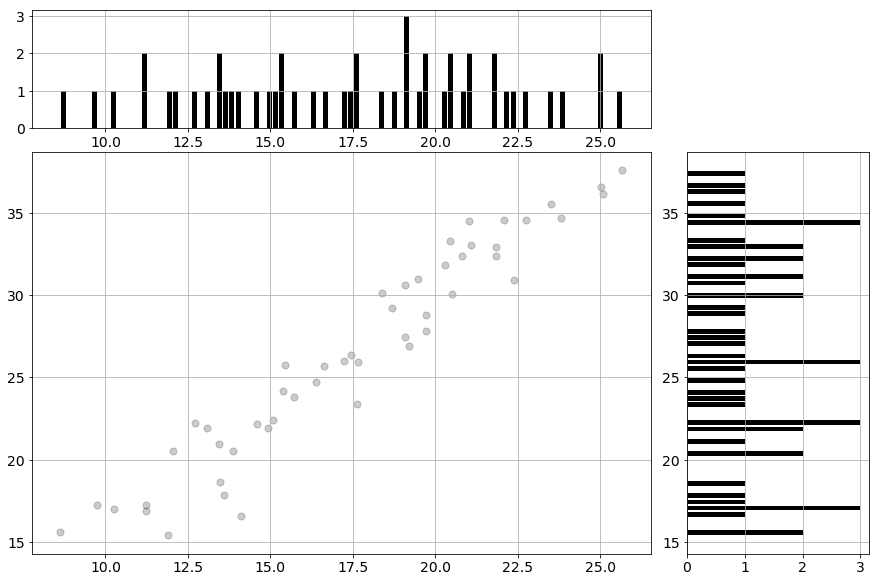

Coeficientul de corelatie :  0.9638387722596928
Coeficientul de corelatie :  0.0


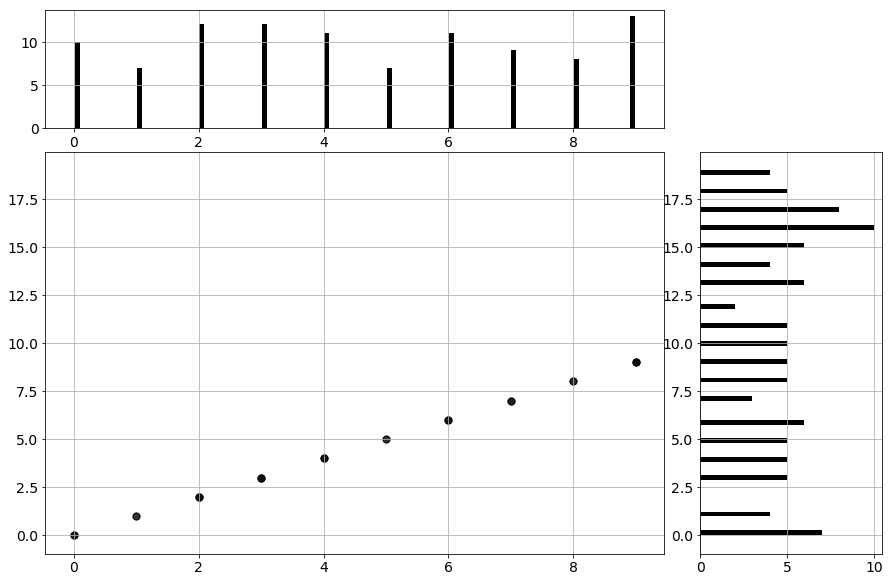

Coeficientul de corelatie :  1.0


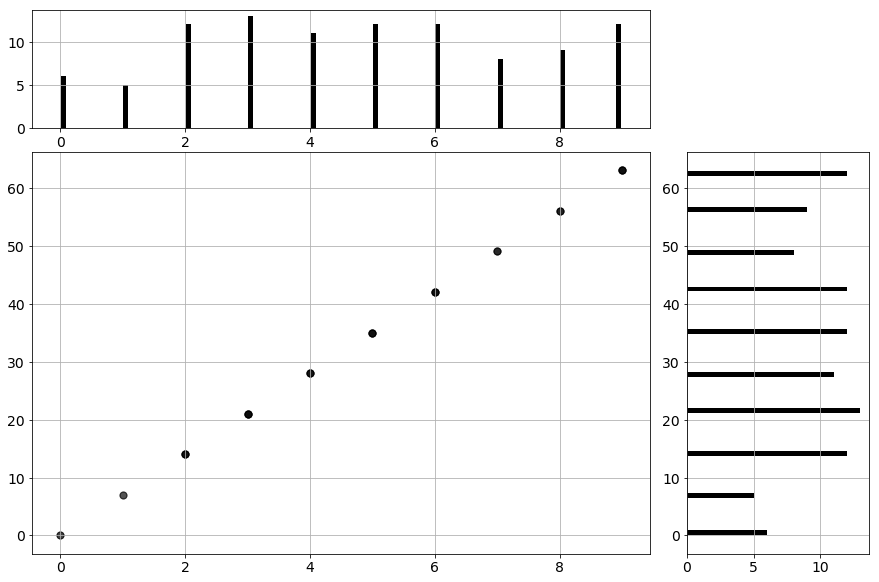

Coeficientul de corelatie :  0.9638387722596928
Intercept :  2.0


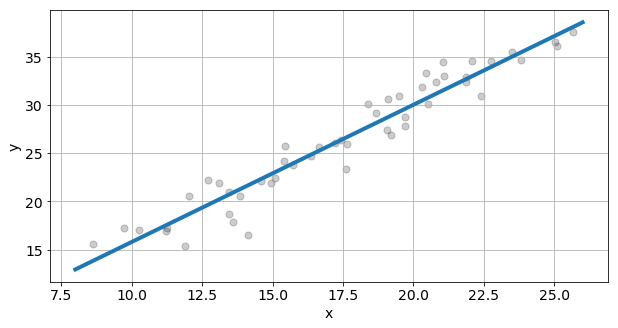

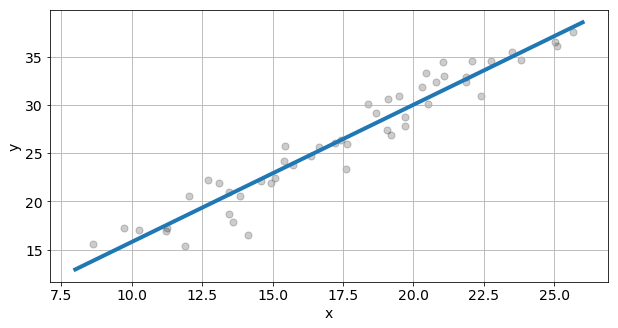

In [19]:
x = np.array(x)
y = np.array(y)
#a)
print("Medie x :", np.mean(x))
print("Medie y :", np.mean(y))
print("Deviatie standard x :", np.std(x))
print("Deviatie standard y :", np.std(y))

#b)
plt.rcParams.update({'font.size': 14})

fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(4, 4)
ax_main = plt.subplot(gs[1:4, :3])
ax_fDist = plt.subplot(gs[0, :3],sharex=ax_main)
ax_sDist = plt.subplot(gs[1:4, 3],sharey=ax_main)

ax_main.scatter(x, y, c='k', alpha = .2, s=50)
ax_main.grid(True)

ax_fDist.hist(x, bins=90, align='mid', rwidth=0.8, color='k')
ax_fDist.grid(True)

ax_sDist.hist(y, bins=60, orientation='horizontal', align='mid', rwidth=0.8, color='k')
ax_sDist.grid(True)

plt.show()

#c)
print("Coeficientul de corelatie : ", np.corrcoef(x,y)[1,0])

#d)
s1 = np.random.randint(10,size=100)
s2 = np.random.randint(20,size=100)
print("Coeficientul de corelatie : ",round( np.corrcoef(s1,s2)[1,0]))

plt.rcParams.update({'font.size': 14})

fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(4, 4)
ax_main = plt.subplot(gs[1:4, :3])
ax_fDist = plt.subplot(gs[0, :3],sharex=ax_main)
ax_sDist = plt.subplot(gs[1:4, 3],sharey=ax_main)

ax_main.scatter(s1, s1, c='k', alpha = .2, s=50)
ax_main.grid(True)

ax_fDist.hist(s1, bins=90, align='mid', rwidth=0.8, color='k')
ax_fDist.grid(True)

ax_sDist.hist(s2, bins=60, orientation='horizontal', align='mid', rwidth=0.8, color='k')
ax_sDist.grid(True)

plt.show()

#e)
s1 = np.random.randint(10,size=100)
s2 = 7*s1
print("Coeficientul de corelatie : ",round( np.corrcoef(s1,s2)[1,0]))

plt.rcParams.update({'font.size': 14})

fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(4, 4)
ax_main = plt.subplot(gs[1:4, :3])
ax_fDist = plt.subplot(gs[0, :3],sharex=ax_main)
ax_sDist = plt.subplot(gs[1:4, 3],sharey=ax_main)

ax_main.scatter(s1, s2, c='k', alpha = .2, s=50)
ax_main.grid(True)

ax_fDist.hist(s1, bins=90, align='mid', rwidth=0.8, color='k')
ax_fDist.grid(True)

ax_sDist.hist(s2, bins=60, orientation='horizontal', align='mid', rwidth=0.8, color='k')
ax_sDist.grid(True)

plt.show()

#f)
print("Coeficientul de corelatie : ", np.corrcoef(x,y)[1,0])
print("Intercept : ", round(np.mean(y)- np.corrcoef(x,y)[1,0] * np.std(y)/np.std(x)*np.mean(x)))


beta1 = np.corrcoef(x,y)[0,1] * np.std(y)/np.std(x)
beta0 = np.mean(y) - beta1 * np.mean(x)
x1 = np.linspace(8,26,100)
y1 = beta1*x1+beta0
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.scatter(x, y, c='k', alpha = .2, s=50)
ax.plot(x1, y1, lw=4)
ax.set(xlabel="x", ylabel="y")
ax.grid(True)
plt.show()


xext = sm.add_constant(x)
model = sm.OLS(y,xext).fit()
beta0 = model.params[0]
beta1 = model.params[1]
x1 = np.linspace(8,26,100)
y1 = beta1*x1+beta0
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.scatter(x, y, c='k', alpha = .2, s=50)
ax.plot(x1, y1, lw=4)
ax.set(xlabel="x", ylabel="y")
ax.grid(True)
plt.show()

Q8. Folosiți setul mtcars.csv. Realizați o regresie liniară cu consumul (miles per gallon) ca variabilă prezisă pe baza puterii motorului (horsepower). Realizați scatter plot-ul și trasați dreapta de regresie. Care este eroarea pătratică medie (RMS) dintre valorile de consum reale și valorile prezise?

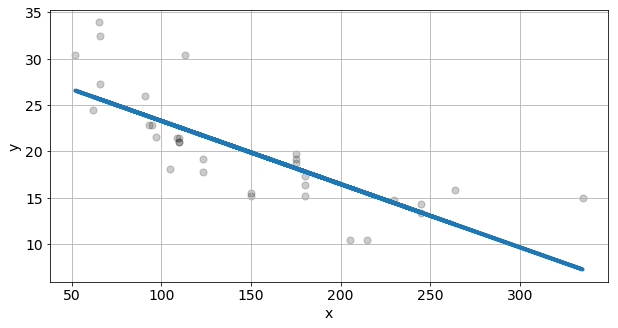

Eroarea patratica medie :  3.7402970868994894


In [20]:
mtcars = pd.read_csv('mtcars.csv')
mtcars.head()
y = mtcars['mpg'].values
x = mtcars['hp'].values

beta1 = np.corrcoef(x,y)[0,1] * np.std(y)/np.std(x)
beta0 = np.mean(y) - beta1 * np.mean(x)
y1 = beta1*x+beta0
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.scatter(x, y, c='k', alpha = .2, s=50)
ax.plot(x, y1, lw=4)
ax.set(xlabel="x", ylabel="y")
ax.grid(True)
plt.show()


rms = sqrt(mean_squared_error(y,y1))
print("Eroarea patratica medie : ", rms)